In [21]:
from math import log2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def load_dataset(filename):
    """
    load dataset from txt file
    """
    dataset = pd.read_csv(filename, sep='\t', header=None) # split with '\t'
    dataset = np.mat(dataset)
    return dataset

In [23]:
def Euclidean_distance(vector_A, vector_B):
    """
    caculate the euclidean distance between vector A and vector B
    """
    return np.sqrt(np.sum(np.power(vector_A - vector_B, 2)))

In [24]:
def random_centroid(dataset, k):
    """
    get k centriods by randomly selecting from dataset
    """
    num_samples, dim = dataset.shape # get the shape of dataset, num_samples for the number of samples in dataset, dim for the number of features(dimensions)
    centroids = np.zeros((k,dim)) # create k centroids with corresponding number of dimensions
    for i in range(k): # loop for every dimension
        index = int(random.uniform(0, num_samples))
        centroids[i,:] = dataset[index,:]
    return centroids

In [25]:
def farthest_centroid(dataset, k):
    num_samples, dim = dataset.shape # get the shape of dataset, num_samples for the number of samples in dataset, dim for the number of features(dimensions)
    centroids = np.zeros((k,dim))
    centroids[0,] = dataset[int(random.uniform(0, num_samples)), :]
    for centroid in range(k-1):
        dists = []
        for i in range(num_samples):
            min_dist = float('inf')
            for j in range(len(centroids)):
                tmp_dist = Euclidean_distance(dataset[i,:], centroids[j, :])
                min_dist = min(min_dist, tmp_dist)
            dists.append(min_dist)
        max_dist = np.argmax(np.array(dists))
        next_centroid = dataset[max_dist,:]
        centroids[centroid+1, :] = next_centroid
    return centroids

In [26]:
def k_means(dataset, k, distance_type = Euclidean_distance, create_centroid = random_centroid):
    """
    general k-means method for clustering
    """
    num_samples = dataset.shape[0] # number of samples
    cluster_assment = np.mat(np.zeros((num_samples, 2))) # record the cluster number and min distances of every sample in dataset

    # step 1: initiate the centroids
    centroids = create_centroid(dataset, k)
    cluster_changed = True
    # step 2: loop for every sample in dataset
    while cluster_changed:
        cluster_changed = False
        # step 3: find the closest centroid
        for i in range(num_samples):
            min_distance = float('inf')
            min_index = -1
            for j in range(k):
                distance = distance_type(centroids[j,:], dataset[i,])
                if distance < min_distance:
                    min_distance = distance
                    min_index = j
            # step 4: check if the cluster is needed to change
            if cluster_assment[i,0] != min_index:
                cluster_changed = True
            cluster_assment[i, :] = min_index, min_distance**2
        # step 5 update centroids
        for centroid in range(k):
            points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == centroid)[0]]
            centroids[centroid,:] = np.mean(points_in_cluster, axis=0)
            # centroids[centroid] = find_medoids(points_in_cluster)
    return centroids, cluster_assment

In [27]:
def k_means_plusplust(dataset, k, distance_type = Euclidean_distance, create_centroid = farthest_centroid):
    """
    k-means++ for clustering
    """
    num_samples = dataset.shape[0] # number of samples
    cluster_assment = np.mat(np.zeros((num_samples, 2))) # record the cluster number and min distances of every sample in dataset

    # step 1: initiate the centroids
    centroids = create_centroid(dataset, k)
    cluster_changed = True
    # step 2: loop for every sample in dataset
    while cluster_changed:
        cluster_changed = False
        # step 3: find the closest centroid
        for i in range(num_samples):
            min_distance = float('inf')
            min_index = -1
            for j in range(k):
                distance = distance_type(centroids[j,:], dataset[i,])
                if distance < min_distance:
                    min_distance = distance
                    min_index = j
            # step 4: check if the cluster is needed to change
            if cluster_assment[i,0] != min_index:
                cluster_changed = True
            cluster_assment[i, :] = min_index, min_distance**2
        # step 5 update centroids
        for centroid in range(k):
            points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == centroid)[0]]
            centroids[centroid,:] = np.mean(points_in_cluster, axis=0)
    return centroids, cluster_assment

In [28]:
def find_medoids(points_in_cluster):
    """
    used in k-medoids
    """
    min_distance = float('inf')
    min_index = 0
    for i in range(points_in_cluster.shape[0]):
        current_dist = 0
        for j in range(points_in_cluster.shape[0]):
            current_dist += Euclidean_distance(points_in_cluster[i,:], points_in_cluster[j,:])
        if current_dist < min_distance:
            min_index = i
            min_distance = current_dist
    return points_in_cluster[min_index]

In [29]:
def k_medoids(dataset, k, distance_type = Euclidean_distance, create_centroid = random_centroid):
    """
    k-medoids for clustering
    """
    num_samples = dataset.shape[0] # number of samples
    cluster_assment = np.mat(np.zeros((num_samples, 2))) # record the cluster number and min distances of every sample in dataset

    # step 1: initiate the centroids
    centroids = create_centroid(dataset, k)
    cluster_changed = True
    # step 2: loop for every sample in dataset
    while cluster_changed:
        cluster_changed = False
        # step 3: find the closest centroid
        for i in range(num_samples):
            min_distance = float('inf')
            min_index = -1
            for j in range(k):
                distance = distance_type(centroids[j,:], dataset[i,])
                if distance < min_distance:
                    min_distance = distance
                    min_index = j
            # step 4: check if the cluster is needed to change
            if cluster_assment[i,0] != min_index:
                cluster_changed = True
            cluster_assment[i, :] = min_index, min_distance**2
        # step 5 update centroids
        for centroid in range(k):
            points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == centroid)[0]]
            centroids[centroid] = find_medoids(points_in_cluster)
    return centroids, cluster_assment

In [30]:
def binarize_k_means(dataset, k, distance_type= Euclidean_distance):
    num_samples = dataset.shape[0] # number of samples
    cluster_assment = np.mat(np.zeros((num_samples, 2))) # record the cluster number and min distances of every sample in dataset
    centroid0 = np.mean(dataset, axis=0).tolist()[0] # recogize the whole dataset as one cluster, calculate its centroid
    centroid_list = [centroid0] # list recording every centroid
    for i in range(num_samples):
        cluster_assment[i,1] = distance_type(np.mat(centroid0), dataset[i,:])**2
    while(len(centroid_list)<k): # loop til existing k clusters
        lowerSSE = float('inf') # use SSE as the metric to choose the best partition point
        for centroid in range(len(centroid_list)):
            points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == centroid)[0], :] # get the points in current cluster
            centroid_mat, split_cluster_ass = k_means(points_in_cluster, 2, distance_type)
            SplitSSE = np.sum(split_cluster_ass[:, 1])
            NoSplitSSE = np.sum(cluster_assment[np.nonzero(cluster_assment[:,0].A != centroid)[0], 1])
            if (SplitSSE+NoSplitSSE) < lowerSSE:
                best_centroid_to_split = centroid
                best_new_centroids = centroid_mat
                best_clust_ass = split_cluster_ass.copy()
                lowerSSE = SplitSSE + NoSplitSSE
        best_clust_ass[np.nonzero(best_clust_ass[:,0].A == 1)[0], 0] = len(centroid_list)
        best_clust_ass[np.nonzero(best_clust_ass[:,0].A == 0)[0], 0] = best_centroid_to_split
        centroid_list[best_centroid_to_split] = best_new_centroids[0, :]
        centroid_list.append(best_new_centroids[1,:])
        cluster_assment[np.nonzero(cluster_assment[:,0].A == best_centroid_to_split)[0], :] = best_clust_ass
    return centroid_list, cluster_assment

In [31]:
def plot_cluster(dataset, centroids, cluster_assment):
    """
    visualize clustering consequence
    """
    num_samples, dim = dataset.shape
    centroids = np.array(centroids)
    k = centroids.shape[0]
    color = ['red', 'g', 'navy', 'darkorange', 'yellow', 'royalblue']
    for i in range(num_samples):
        color_index = int(cluster_assment[i, 0])
        plt.scatter(dataset[i,0], dataset[i,1], c=color[color_index], alpha=.5)

    for i in range(k):
        plt.scatter(centroids[i,0], centroids[i,1], s=100, c='k', marker='+')
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()

In [32]:
def calinski_harabasz(dataset, cluster_assment, centroids):
    """
    calculate CH metric to estimate quality of clustering consequence
    """
    k = len(centroids)
    traceB = 0.
    centroid0 = np.mean(dataset, axis=0).tolist()[0]
    for j in range(k):
        points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == j)[0]]
        traceB += len(points_in_cluster)*(Euclidean_distance(centroids[j], centroid0)**2)
    traceW = 0.
    for j in range(k):
        points_in_cluster = dataset[np.nonzero(cluster_assment[:, 0].A == j)[0]]
        for point in points_in_cluster:
            traceW += Euclidean_distance(point, centroids[j])**2
    CH = (traceB / (k-1)) / (traceW / (len(dataset) - k))
    return CH

In [33]:
def caculate_cluster_accuarcy(list_dicts):
    sum_of_Ni = 0
    total_num = 0
    for i in range(len(list_dicts)):
        max_num, label = max(zip(list_dicts[i].values(), list_dicts[i].keys()))
        sum_of_Ni += max_num
        total_num += sum(list_dicts[i].values())
    accuracy = sum_of_Ni / total_num
    return accuracy

In [34]:
def calculate_cluster_entropy(list_dicts):
    total_entropy = 0.
    total_num = 0
    for i in range(len(list_dicts)):
        entropy = 0.
        num_Ci = sum(list_dicts[i].values())
        total_num += num_Ci
        for key in list_dicts[i].keys():
            entropy -= (list_dicts[i][key] / num_Ci) * log2(list_dicts[i][key] / num_Ci)
        total_entropy += num_Ci*entropy
    total_entropy /= total_num
    return total_entropy

# testData

E:\Coding\Python\lib\site-packages\numpy\matrixlib\defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\Coding\Python\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(1.5, 8.5)

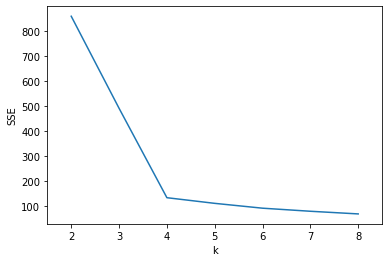

In [35]:
#elbow method
dataset = load_dataset('testSet.txt')
SSE_list = []
for k in range(2,9):
    min_SSE = float('inf')
    for i in range(10):
        centroids, cluster_assment = k_means(dataset, k, create_centroid=random_centroid)
        current_SSE = np.sum(cluster_assment[:,1])
        if current_SSE < min_SSE:
            min_SSE = current_SSE
    SSE_list.append(min_SSE)
plt.plot(range(2,9),SSE_list)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xlim(1.5,8.5)

(1.5, 8.5)

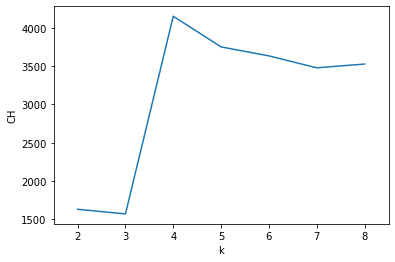

(1.5, 8.5)

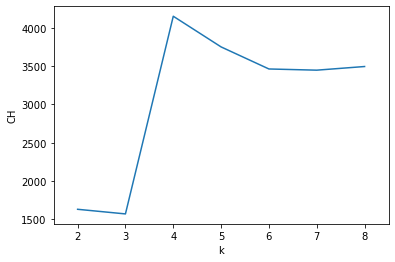

In [36]:
# use CH metric to choose best k value
CH_list = []
for k in range(2,9):
    max_CH = 0.
    for i in range(10):
        centroids, cluster_assment = k_means(dataset, k, create_centroid=random_centroid)
        current_CH = calinski_harabasz(dataset, cluster_assment, centroids)
        if current_CH > max_CH:
            max_CH = current_CH
    CH_list.append(max_CH)
plt.plot(range(2,9), CH_list)
plt.xlabel('k')
plt.ylabel('CH')
plt.xlim(1.5,8.5)

# Iris

In [37]:
# use iris dataset
dataset = pd.read_csv('Iris.txt', header=None)
train_data = np.mat(dataset.iloc[:,0:4])
label = dataset.iloc[:, 4]

E:\Coding\Python\lib\site-packages\numpy\matrixlib\defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\Coding\Python\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(1.5, 8.5)

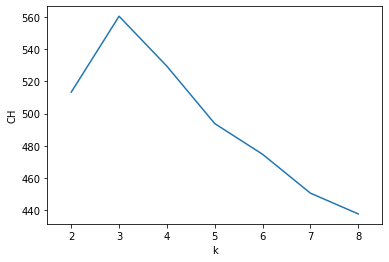

E:\Coding\Python\lib\site-packages\numpy\matrixlib\defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\Coding\Python\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(1.5, 8.5)

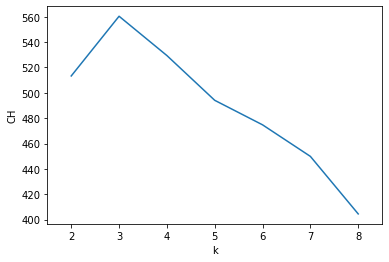

In [38]:
CH_list = []
for k in range(2,9):
    max_CH = 0.
    for i in range(10):
        centroids, cluster_assment = k_means(train_data, k, create_centroid=random_centroid)
        current_CH = calinski_harabasz(train_data, cluster_assment, centroids)
        if current_CH > max_CH:
            max_CH = current_CH
    CH_list.append(max_CH)
plt.plot(range(2,9), CH_list)
plt.xlabel('k')
plt.ylabel('CH')
plt.xlim(1.5,8.5)

In [39]:
# k-means
k = 3
centroids, cluster_assment = k_means(train_data, k, create_centroid=random_centroid)

In [40]:
cluster_list = []
len_list = []
for j in range(k):
    cluster_list.append(label[np.nonzero(cluster_assment[:, 0].A == j)[0]].tolist())
for j in range(k):
    len_list.append(len(cluster_list[j]))
list_dicts = []
for list in cluster_list:
    dict = {}
    for item in list:
        if item in dict.keys():
            dict[item] += 1
        else:
            dict[item] = 1
    list_dicts.append(dict)
accuracy = caculate_cluster_accuarcy(list_dicts)
entropy = calculate_cluster_entropy(list_dicts)
print("Accuracy = {:.2%}, Cluster Entropy = {:.3}".format(accuracy, entropy))

Accuracy = 88.67%, Cluster Entropy = 0.418
Accuracy = 88.67%, Cluster Entropy = 0.418
